# Data Camp
## Statistical Thinking in Python (Part 1)

### EDA = Exploritory Data Analysis

-> plotting and computing simple summary statistics. This process, called EDA, is a crucial first step in statistical analysis of data.


About DataSet There are 13 attributes: 
1. Age: Age (in years) 
2. Sex: gender (1 = male; 0 = female) 
3.ChestPain: Chest Pain type -- 1: typical angina (all criteria present) -- 2: atypical angina (two of three criteria satisfied) -- 3: non-anginal pain (less than one criteria satisfied) -- 4: asymptomatic (none of the criteria are satisfied) 
4. Restbps: Resting Blood pressure (in mmHg, upon admission to the hospital) 
5. Chol: serum cholesterol in mg/dL 
6. Fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false 
7. RestECG: Resting electrocardiogram results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. MaxHR: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise. 
9.Exang: exercise induced angina (1 = yes; 0 = no) 
10. Oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest) 
11. Slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
12.Ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue). 
13. AHD: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) 
14.AHD: 0 = no disease, 1 = disease

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt#

pd.set_option('display.max_columns', None)

In [39]:
filename = r"C:\Users\MichelleAlexander\OneDrive - Digital Diagnostics AG\Desktop\Private\GitHubMA\Heart Attack Data Set.csv"
df = pd.read_csv(filename)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Use _ = plt.hist(data), common practice in python. 
reason: plt.hist(data) gives you 3 arrays, but you only want to plot the data (I dont quite understand)

Use seaborns sns.set() function to result in nicely formatted plots

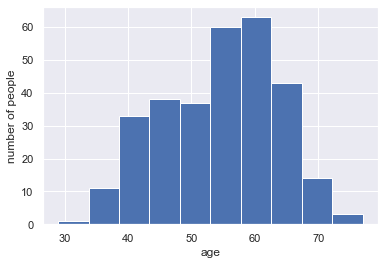

In [40]:
sns.set()
_ = plt.hist(df["age"])
_ = plt.xlabel("age")
_ = plt.ylabel("number of people")
plt.show()

### binning bias
Same data may be interpreted differently depending on the choice of bins (look at the counts on the y axis)

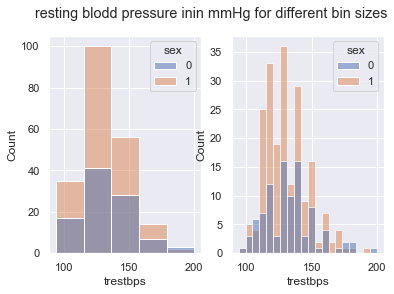

In [43]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(data = df, x = "trestbps", bins = 5, hue = "sex", ax=axs[0])
sns.histplot(data = df, x = "trestbps", bins = 20, hue= "sex", ax=axs[1])
plt.suptitle("resting blodd pressure inin mmHg for different bin sizes")
plt.show()

To avoid binning bias, you can use swarmplots

C:\Users\MichelleAlexander\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


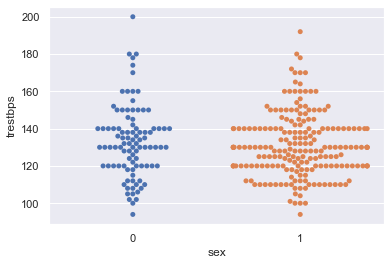

In [44]:
sns.swarmplot(data= df, y= "trestbps", x= "sex")
plt.show()

Alternative to bee swarm plot:
### Compute an empirical cumulative distribution function (ECDF)
first get ecdf funtion:

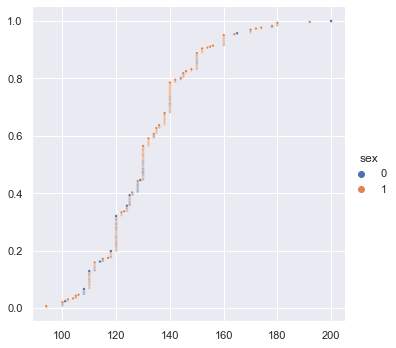

In [57]:
def ecdf(data, catagory):
    """Compute ECDF for one-dimensional array of measurements"""
    #number of data points: n
    n = len(data)
    #x data for the ecdf data, which is the data only sorted: x
    x = np.sort(data)
    #y-data for the ecdf, which is the probabilty range: y 
    #remember, the end value for np.arange is not inclusive, therefore add 1)
    y = np.arange(1,n+1)/n
    
    sns.relplot(data = data, x=x,y=y, kind = "scatter", linestyle="None", marker=".", hue= catagory)
    plt.show()
    
ecdf(df["trestbps"], df["sex"])

    